In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [17]:
k_out = [5e-5, 5e-4, 5e-3]
models = ['PPF1','PPF2','FLD1','FLD1S']
w0 = {'PPF1':-0.7,'PPF2':-1.15,'FLD1':-0.7,'FLD1S':-0.7}
wa = {'PPF1':0.,'PPF2':0.5,'FLD1':0.,'FLD1S':0.}
omega_cdm = {'PPF1':0.104976,'PPF2':0.120376,'FLD1':0.104976,'FLD1S':0.104976}
omega_b = 0.022
##Omega_cdm = {'PPF1':0.26,'PPF2':0.21,'FLD1':0.26,'FLD1S':0.26}
##Omega_b = 0.05
h = {'PPF1':0.64,'PPF2':0.74,'FLD1':0.64,'FLD1S':0.64}
cosmo = {}

for M in models:
    use_ppf = 'yes'
    gauge = 'Newtonian'
    if 'FLD' in M:
        use_ppf = 'no'
    if 'S' in M:
        gauge = 'Synchronous'
        
    cosmo[M] = Class()
    
    cosmo[M].set({'output':'tCl Mpk dTk vTk','k_output_values':str(k_out).strip('[]'),
                  'h':h[M],
                  'omega_b':omega_b,'omega_cdm':omega_cdm[M],
                  ##'Omega_b':Omega_b,'omega_cdm':Omega_cdm[M],
                  'cs2_fld':1.,
          'w0_fld':w0[M],'wa_fld':wa[M],'Omega_Lambda':0.,'gauge':gauge,
                 'use_ppf':use_ppf})
    cosmo[M].compute()

(6e-11, 1e-09)

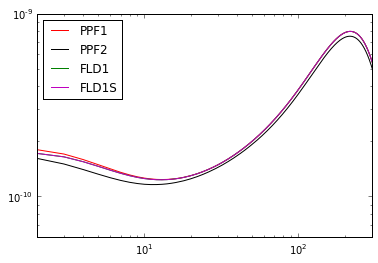

In [18]:
colours = ['r','k','g','m']
for i,M in enumerate(models):
    cl = cosmo[M].raw_cl()
    l = cl['ell']
    
    plt.loglog(l,cl['tt']*l*(l+1)/(2.*np.pi),label=M,color=colours[i])
plt.legend(loc='upper left')

plt.xlim([2,300])
#plt.xlim([20,300])

plt.ylim([6e-11,1e-9])

(0.3, 0.63)

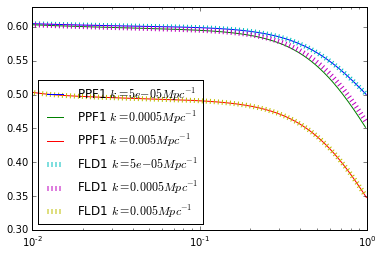

In [19]:
for M in ['PPF1','FLD1']:
    csm = cosmo[M]
    pt = csm.get_perturbations()
    pts = pt['scalar']
    for i,k in enumerate(k_out):
        ptk = pts[i]
        a = ptk['a']
        phi = ptk['phi']
        psi = ptk['psi']
        if 'FLD' in M:
            ls = ':'
            lw=5
        else:
            ls = '-'
            lw=1
        plt.semilogx(a,0.5*(phi+psi),label=M+' '+'$k='+str(k)+'Mpc^{-1}$',ls=ls,lw=lw)
plt.legend(loc='lower left')
plt.xlim([1e-2,1])
plt.ylim([0.3,0.63])

In [1]:
print pts

NameError: name 'pts' is not defined

In [10]:
print 0.31*0.64**2-0.022
print 0.26*0.74**2-0.022

0.104976
0.120376
